In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
np.random.seed(42)

In [2]:
import sys
def loading_bar(progress, total, length=30):
    percent = int(100 * progress / total)
    filled = int(length * progress / total)
    bar = '█' * filled + '-' * (length - filled)
    sys.stdout.write(f'\rRunning Simulations: |{bar}| {percent}%')
    sys.stdout.flush()

######

In [4]:
T = 500
r = 0.4
z = mf.random_walk(T)
crit_val_90 = 1.167
crit_val_95 = 1.491
crit_val_99 = 1.969
k = int(r*len(z))

### Cointegration - 2

In [6]:
beta = np.array([0.2,0.5])
e_1 = np.random.normal(0,1,T)
e_2 = np.random.normal(0,1,T)

#### Delta = 0.01

beta = 0.3043
ADF on residuals  stat = -14.320


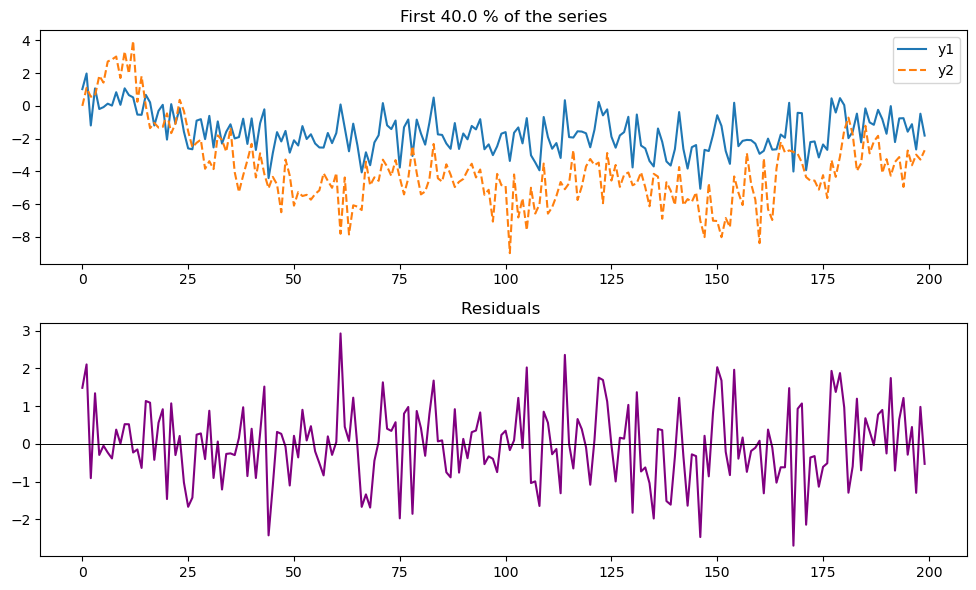

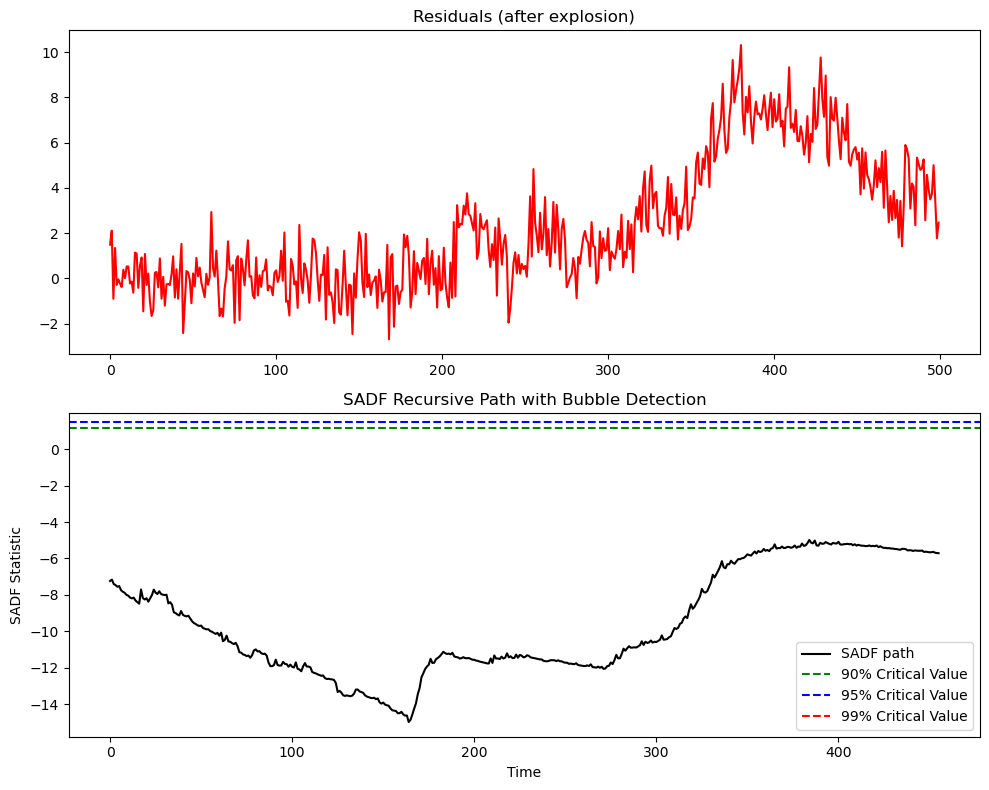

Time series is Non-Stationary



In [8]:
delta = 0.01
y1 = beta[0]*z + e_1
y2 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[1], delta = delta,eps = e_2)

""" Generating Cointegration Relationship and Residuals"""
X = sm.add_constant(y2[:k])
reg = sm.OLS(y1[:k], X).fit()
a, b  = reg.params
eps_k = y1[:k] - (a + b * y2[:k]) 

print(f"beta = {b:.4f}")
print(f"ADF on residuals  stat = {adfuller(eps_k, autolag='AIC')[0]:.3f}")

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], '--', label='y2')
plt.title(f'First {r*100} % of the series')
plt.legend()

plt.subplot(2,1,2)
plt.plot(eps_k, color='purple')
plt.axhline(0, color='black', lw=.7)
plt.title(f'Residuals ')
plt.tight_layout()
plt.show()

"""Residuals after explosion"""
res_aft_exp = y1[k:] - (a + b * y2[k:])
new_res = np.concatenate([eps_k, res_aft_exp])

""" Applying SADF """
min_win = int(np.floor((0.01 + 1.8 / np.sqrt(T)) * T))
sadf = mf.sadf_series(new_res, min_win)


plt.figure(figsize=(10, 8))

# --- Subplot 1: Residuals ---
plt.subplot(2, 1, 1)
plt.plot(new_res, color='red')
plt.title('Residuals (after explosion)')
#plt.axhline(0, color='black', linewidth=0.7)


# --- Subplot 2: SADF path ---
plt.subplot(2, 1, 2)
plt.plot(sadf, label='SADF path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

for i, val in enumerate(sadf):
    if val > crit_val_95:
        plt.axvline(i+min_win, color='orange', linestyle='--', alpha=0.6, label='Start of Bubble')
        break

plt.title("SADF Recursive Path with Bubble Detection")
plt.xlabel("Time")
plt.ylabel("SADF Statistic")
plt.legend()

plt.tight_layout()
plt.show()

if adfuller(new_res, autolag='AIC')[0] > crit_val_99:
    print(f"Time series is Explosive. ADF Value is: {np.round(adfuller(new_res, autolag='AIC')[0],2)}")
else:
    print("Time series is Non-Stationary")
print("")


#### Delta = 0.025

beta = 0.3043
ADF on residuals  stat = -14.320


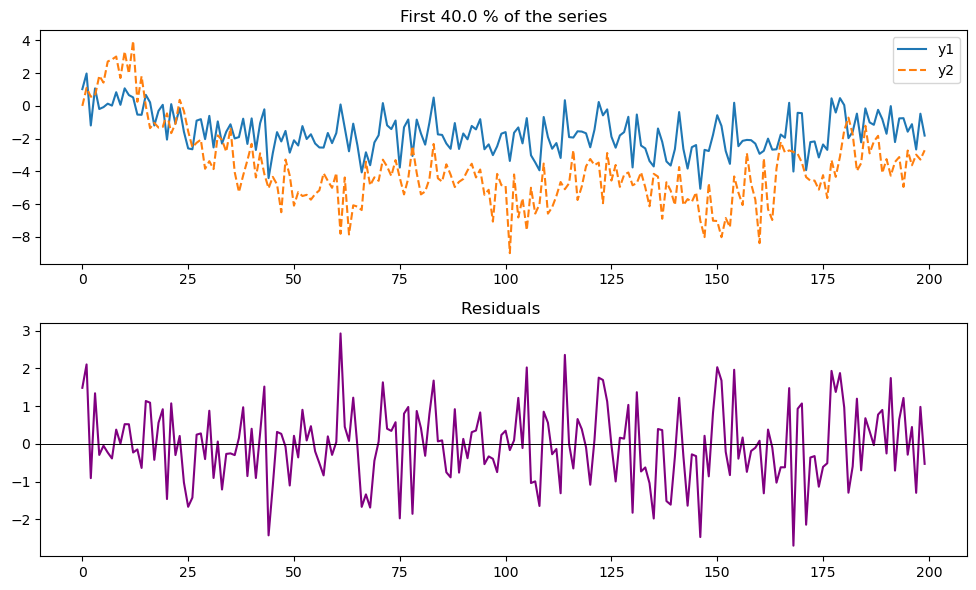

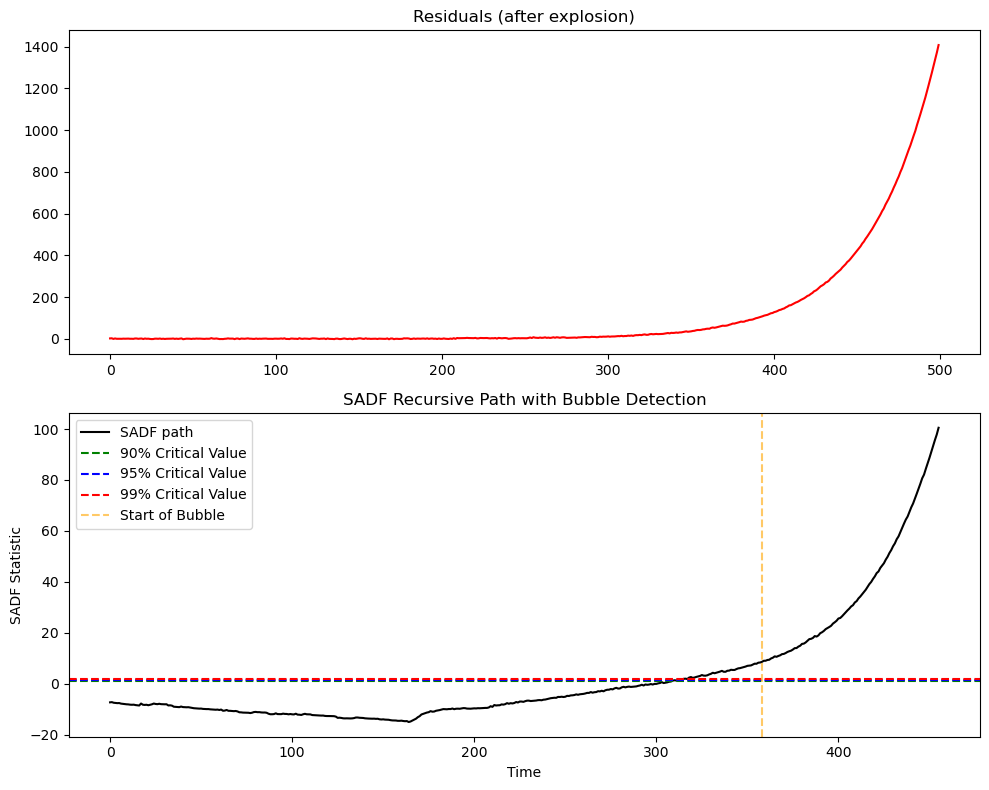

Time series is Explosive. ADF Value is: 13.95



In [10]:
delta = 0.025
y1 = beta[0]*z + e_1
y2 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[1], delta = delta,eps = e_2)

""" Generating Cointegration Relationship and Residuals"""
X = sm.add_constant(y2[:k])
reg = sm.OLS(y1[:k], X).fit()
a, b  = reg.params
eps_k = y1[:k] - (a + b * y2[:k]) 

print(f"beta = {b:.4f}")
print(f"ADF on residuals  stat = {adfuller(eps_k, autolag='AIC')[0]:.3f}")

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], '--', label='y2')
plt.title(f'First {r*100} % of the series')
plt.legend()

plt.subplot(2,1,2)
plt.plot(eps_k, color='purple')
plt.axhline(0, color='black', lw=.7)
plt.title(f'Residuals ')
plt.tight_layout()
plt.show()

"""Residuals after explosion"""
res_aft_exp = y1[k:] - (a + b * y2[k:])
new_res = np.concatenate([eps_k, res_aft_exp])

""" Applying SADF """
min_win = int(np.floor((0.01 + 1.8 / np.sqrt(T)) * T))
sadf = mf.sadf_series(new_res, min_win)


plt.figure(figsize=(10, 8))

# --- Subplot 1: Residuals ---
plt.subplot(2, 1, 1)
plt.plot(new_res, color='red')
plt.title('Residuals (after explosion)')
#plt.axhline(0, color='black', linewidth=0.7)


# --- Subplot 2: SADF path ---
plt.subplot(2, 1, 2)
plt.plot(sadf, label='SADF path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

for i, val in enumerate(sadf):
    if val > crit_val_95:
        plt.axvline(i+min_win, color='orange', linestyle='--', alpha=0.6, label='Start of Bubble')
        break

plt.title("SADF Recursive Path with Bubble Detection")
plt.xlabel("Time")
plt.ylabel("SADF Statistic")
plt.legend()

plt.tight_layout()
plt.show()

if adfuller(new_res, autolag='AIC')[0] > crit_val_99:
    print(f"Time series is Explosive. ADF Value is: {np.round(adfuller(new_res, autolag='AIC')[0],2)}")
else:
    print("Time series is Non-Stationary")
print("")


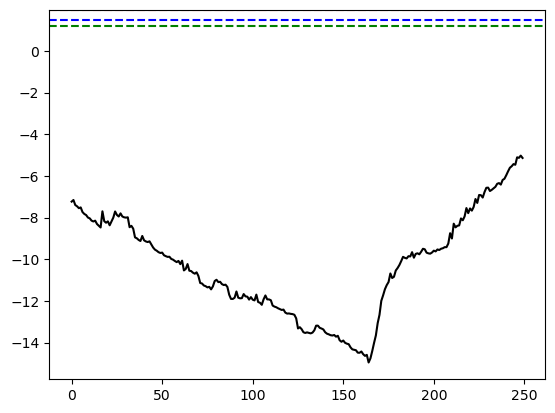

In [11]:
plt.plot(sadf[:250], label='SADF path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

#### Delta = 0.05

beta = 0.3043
ADF on residuals  stat = -14.320


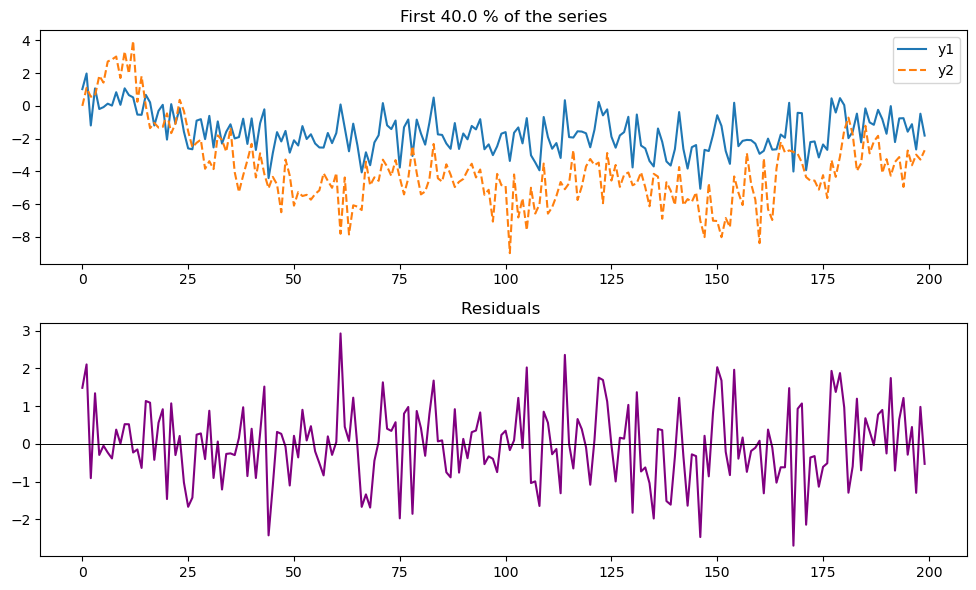

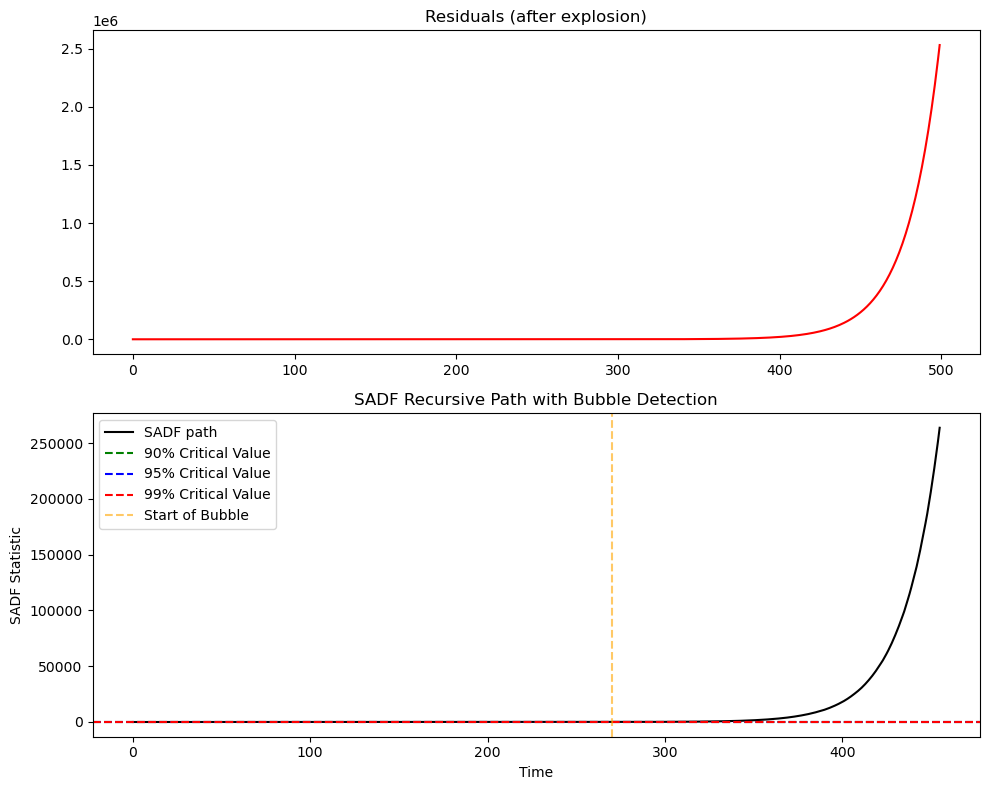

Time series is Explosive. ADF Value is: 13.37



In [13]:
delta = 0.05
y1 = beta[0]*z + e_1
y2 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[1], delta = delta,eps = e_2)

""" Generating Cointegration Relationship and Residuals"""
X = sm.add_constant(y2[:k])
reg = sm.OLS(y1[:k], X).fit()
a, b  = reg.params
eps_k = y1[:k] - (a + b * y2[:k]) 

print(f"beta = {b:.4f}")
print(f"ADF on residuals  stat = {adfuller(eps_k, autolag='AIC')[0]:.3f}")

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], '--', label='y2')
plt.title(f'First {r*100} % of the series')
plt.legend()

plt.subplot(2,1,2)
plt.plot(eps_k, color='purple')
plt.axhline(0, color='black', lw=.7)
plt.title(f'Residuals ')
plt.tight_layout()
plt.show()

"""Residuals after explosion"""
res_aft_exp = y1[k:] - (a + b * y2[k:])
new_res = np.concatenate([eps_k, res_aft_exp])

""" Applying SADF """
min_win = int(np.floor((0.01 + 1.8 / np.sqrt(T)) * T))
sadf = mf.sadf_series(new_res, min_win)


plt.figure(figsize=(10, 8))

# --- Subplot 1: Residuals ---
plt.subplot(2, 1, 1)
plt.plot(new_res, color='red')
plt.title('Residuals (after explosion)')
#plt.axhline(0, color='black', linewidth=0.7)


# --- Subplot 2: SADF path ---
plt.subplot(2, 1, 2)
plt.plot(sadf, label='SADF path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

for i, val in enumerate(sadf):
    if val > crit_val_95:
        plt.axvline(i+min_win, color='orange', linestyle='--', alpha=0.6, label='Start of Bubble')
        break

plt.title("SADF Recursive Path with Bubble Detection")
plt.xlabel("Time")
plt.ylabel("SADF Statistic")
plt.legend()

plt.tight_layout()
plt.show()

if adfuller(new_res, autolag='AIC')[0] > crit_val_99:
    print(f"Time series is Explosive. ADF Value is: {np.round(adfuller(new_res, autolag='AIC')[0],2)}")
else:
    print("Time series is Non-Stationary")
print("")


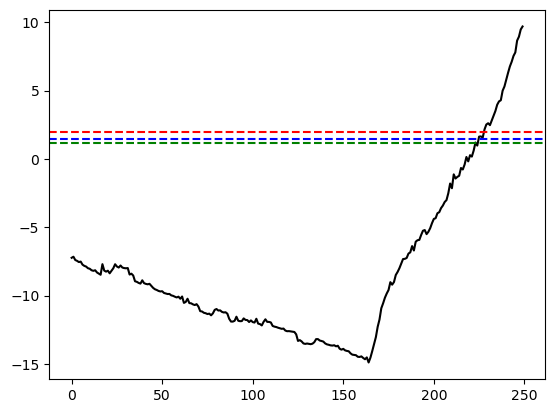

In [14]:
plt.plot(sadf[:250], label='SADF path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

### Cointegration - 3

In [16]:
""" 1 time series is Bubble """

' 1 time series is Bubble '

In [17]:
beta = np.array([0.2,0.5,-0.1])
e_1 = np.random.normal(0,1,T)
e_2 = np.random.normal(0,1,T)
e_3 = np.random.normal(0,1,T)

Cointegration Rank: 3

cointegration vectors:
      beta_1    beta_2    beta_3
y1  1.000000  1.000000  1.000000
y2 -0.268014 -0.727867  3.742732
y3  0.662015 -1.853440 -1.059046

Residuals (first 5 rows):
    resid_1   resid_2   resid_3
0  1.222575 -0.087830  0.326003
1  0.128425 -2.232793 -1.336990
2 -0.825360  0.394180 -1.242508
3 -0.326674  1.409675  4.999079
4 -0.381534  3.268515 -1.111384


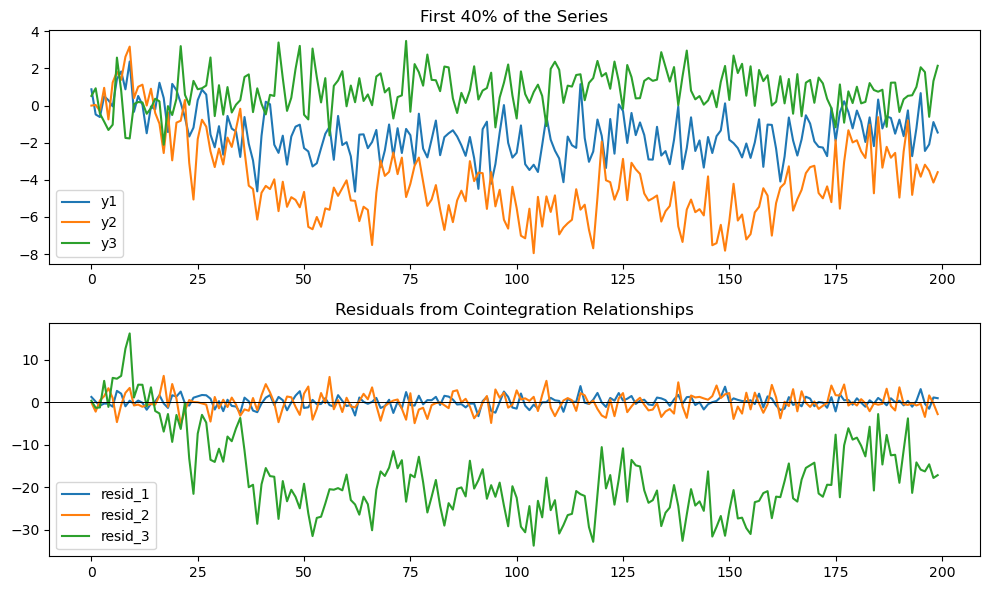

ADF on resid_1: stat = -11.171
ADF on resid_2: stat = -13.655
ADF on resid_3: stat = -2.416

Panel SADF (mean path) – max = -4.178


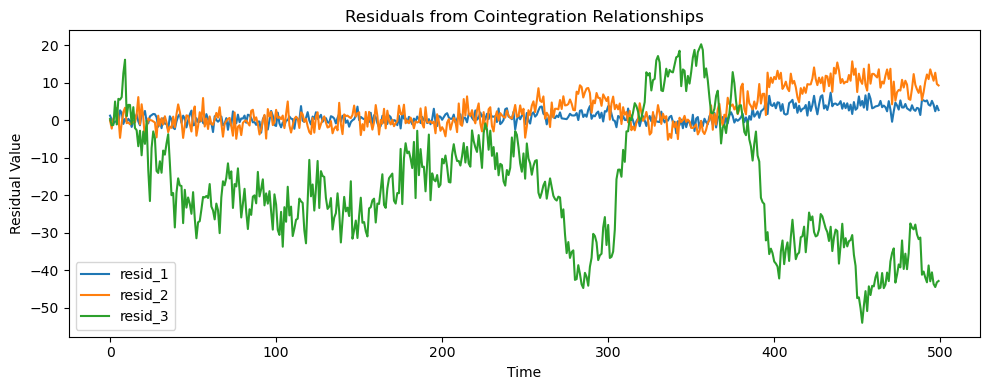

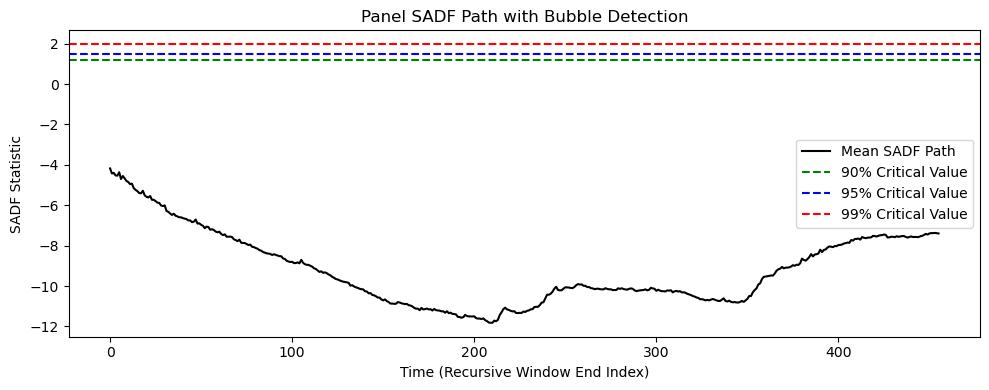

In [18]:
delta = 0.01
y1 = beta[0]*z + e_1
y2 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[1], delta = delta,eps = e_2)
y3 = beta[2]*z + e_3
df = pd.DataFrame({'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k]}) 


""" Generating Cointegration Relationship and Residuals"""
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\ncointegration vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], label='y2')
plt.plot(y3[:k], label='y3')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()


# --- ADF on each residual series ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")


""" Residuals after Bubble """
df_post = pd.DataFrame({'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:]})
res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post,
                        index=df_post.index,
                        columns=res_pre.columns)

# concatenate residuals so they match full sample length
residuals = pd.concat([res_pre, res_post], axis = 0).reset_index(drop=True)

# ------------- 4.  SADF test on each residual path ------------------------
r0        = 0.01 + 1.8 / np.sqrt(T)
min_win   = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

# equal-weight “panel” SADF (average across residuals)
panel_sadf = sadf_paths.mean(axis=0)
best_stat  = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")


# --- 1. Final residuals from all cointegration vectors ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)

#plt.axhline(0, color='k', lw=0.6)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Panel SADF path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

for i, val in enumerate(panel_sadf):
    if val > crit_val_95:
        plt.axvline(i + min_win, color='orange', linestyle='--', alpha=0.6, label='Start of Bubble')
        break

plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
""" 2 time series are Bubble """

' 2 time series are Bubble '

Cointegration Rank: 3

cointegration vectors:
      beta_1    beta_2    beta_3
y1  1.000000  1.000000  1.000000
y2 -0.275121 -0.754963  3.775451
y3  0.620685 -2.000105 -1.033433

Residuals (first 5 rows):
    resid_1   resid_2   resid_3
0  0.877704  0.877704  0.877704
1  0.089645 -2.370475 -1.311974
2 -0.805452  0.465368 -1.263038
3 -0.297716  1.510642  5.008219
4 -0.321896  3.481544 -1.169469


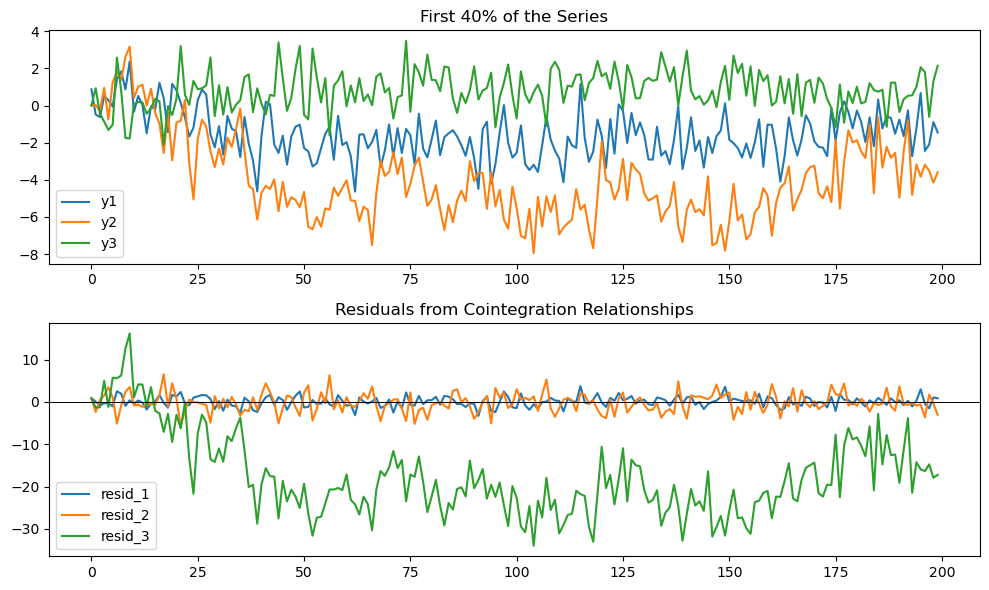

ADF on resid_1: stat = -11.152
ADF on resid_2: stat = -13.713
ADF on resid_3: stat = -2.418

Panel SADF (mean path) – max = 4.169


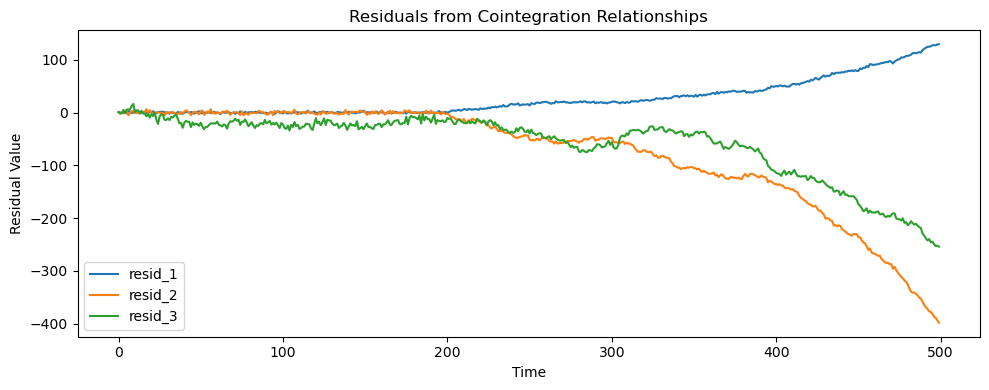

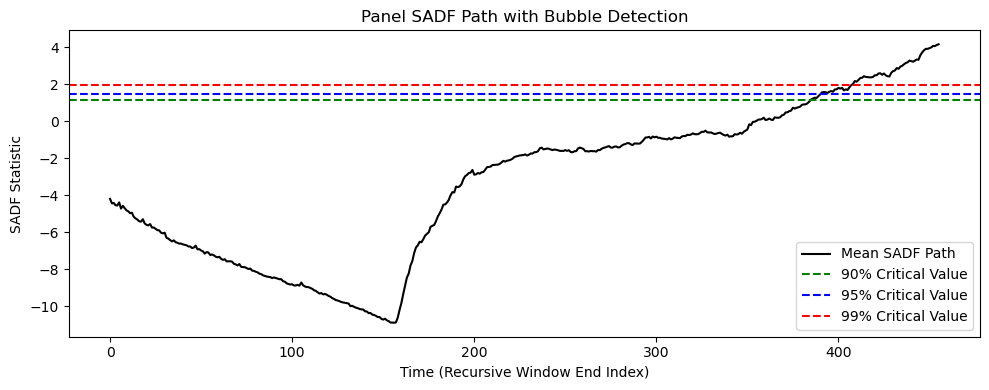

In [20]:
delta = 0.01
y1 = beta[0]*z + e_1
y2 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[1], delta = delta,eps = e_2)
y3 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[2], delta = delta,eps = e_3)
df = pd.DataFrame({'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k]}) 


""" Generating Cointegration Relationship and Residuals"""
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\ncointegration vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], label='y2')
plt.plot(y3[:k], label='y3')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()


# --- ADF on each residual series ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")


""" Residuals after Bubble """
df_post = pd.DataFrame({'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:]})
res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post,
                        index=df_post.index,
                        columns=res_pre.columns)

# concatenate residuals so they match full sample length
residuals = pd.concat([res_pre, res_post], axis = 0).reset_index(drop=True)

# ------------- 4.  SADF test on each residual path ------------------------
r0        = 0.01 + 1.8 / np.sqrt(T)
min_win   = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

# equal-weight “panel” SADF (average across residuals)
panel_sadf = sadf_paths.mean(axis=0)
best_stat  = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")


# --- 1. Final residuals from all cointegration vectors ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)

#plt.axhline(0, color='k', lw=0.6)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Panel SADF path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')


plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
""" 3 time series are Bubble"""

' 3 time series are Bubble'

Cointegration Rank: 3

cointegration vectors:
      beta_1    beta_2    beta_3
y1  1.000000  1.000000  1.000000
y2 -0.277363 -0.763968  3.602964
y3  0.606216 -2.058305 -0.972094

Residuals (first 5 rows):
    resid_1   resid_2   resid_3
0  0.000000  0.000000  0.000000
1  0.076077 -2.425049 -1.260772
2 -0.798554  0.493111 -1.239622
3 -0.287342  1.552380  4.790147
4 -0.301202  3.564775 -1.121414


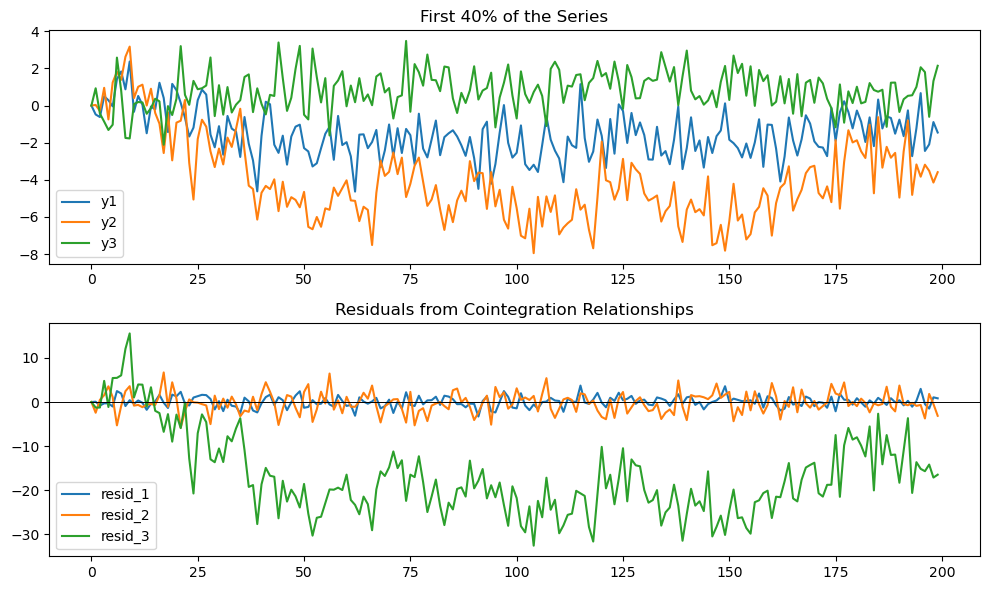

ADF on resid_1: stat = -11.117
ADF on resid_2: stat = -13.691
ADF on resid_3: stat = -2.413

Panel SADF (mean path) – max = 4.601


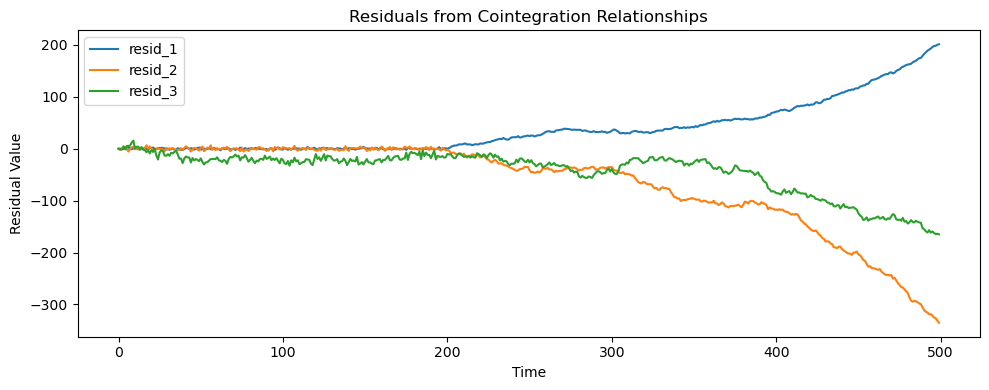

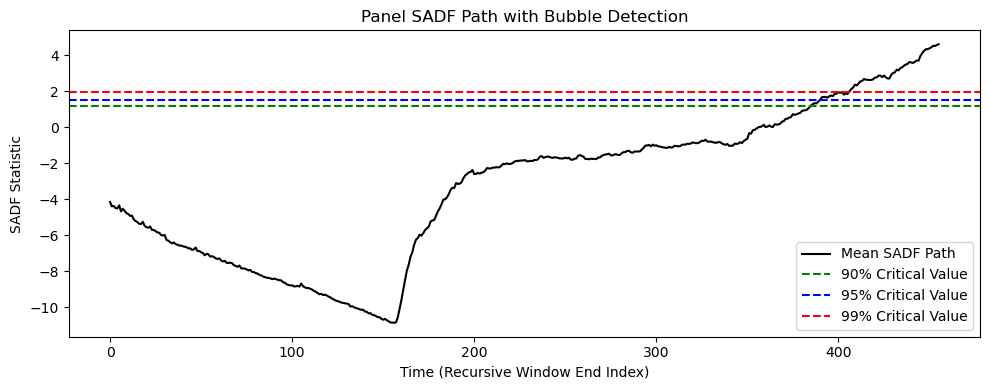

In [22]:
# y1 = beta[0]*z + e_1
y1 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[0], delta = delta,eps = e_1)
y2 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[1], delta = delta,eps = e_2)
y3 = mf.generate_bubble_series_from_z(z = z, r = r, beta = beta[2], delta = delta,eps = e_3)
df = pd.DataFrame({'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k]}) 


""" Generating Cointegration Relationship and Residuals"""
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\ncointegration vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], label='y2')
plt.plot(y3[:k], label='y3')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()


# --- ADF on each residual series ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")


""" Residuals after Bubble """
df_post = pd.DataFrame({'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:]})
res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post,
                        index=df_post.index,
                        columns=res_pre.columns)

# concatenate residuals so they match full sample length
residuals = pd.concat([res_pre, res_post], axis = 0).reset_index(drop=True)

# ------------- 4.  SADF test on each residual path ------------------------
r0        = 0.01 + 1.8 / np.sqrt(T)
min_win   = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

# equal-weight “panel” SADF (average across residuals)
panel_sadf = sadf_paths.mean(axis=0)
best_stat  = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")


# --- 1. Final residuals from all cointegration vectors ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)

#plt.axhline(0, color='k', lw=0.6)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Panel SADF path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')


plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()

### Cointegration - 5

In [24]:
beta = np.array([0.2,0.5,-0.1, 1.2,-0.8])
e_1 = np.random.normal(0,1,T)
e_2 = np.random.normal(0,1,T)
e_3 = np.random.normal(0,1,T)
e_4 = np.random.normal(0,1,T)
e_5 = np.random.normal(0,1,T)

Cointegration Rank: 5

cointegration vectors:
      beta_1    beta_2    beta_3    beta_4    beta_5
y1  1.000000  1.000000  1.000000  1.000000  1.000000
y2  5.595897 -0.762276 -0.917901  0.965639  2.407175
y3  4.416451  0.517552 -3.223782 -0.743555  0.577452
y4  2.394835  0.096659  1.547586 -0.775122  8.478813
y5  6.506361 -0.164088  2.518603 -0.179450 -4.496265

Residuals (first 5 rows):
     resid_1   resid_2   resid_3   resid_4    resid_5
0   1.286454 -3.405426 -0.737641  0.531573  -1.971373
1 -10.617029 -0.449531 -3.452894 -0.323760  -6.398614
2 -15.330110 -0.282722 -7.581380  1.136778   9.562622
3   3.672019  2.223696 -0.113809  1.250425  45.504288
4  -3.516231  0.123666  6.721474  1.055269  28.144068


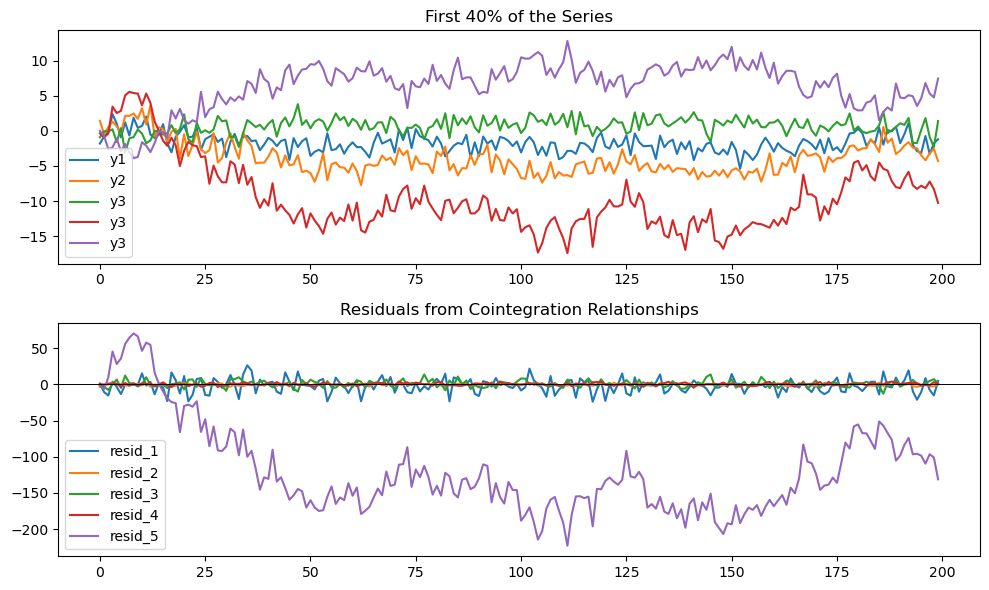

ADF on resid_1: stat = -13.354
ADF on resid_2: stat = -15.614
ADF on resid_3: stat = -14.738
ADF on resid_4: stat = -13.784
ADF on resid_5: stat = -2.528

Panel SADF (mean path) – max = 0.341


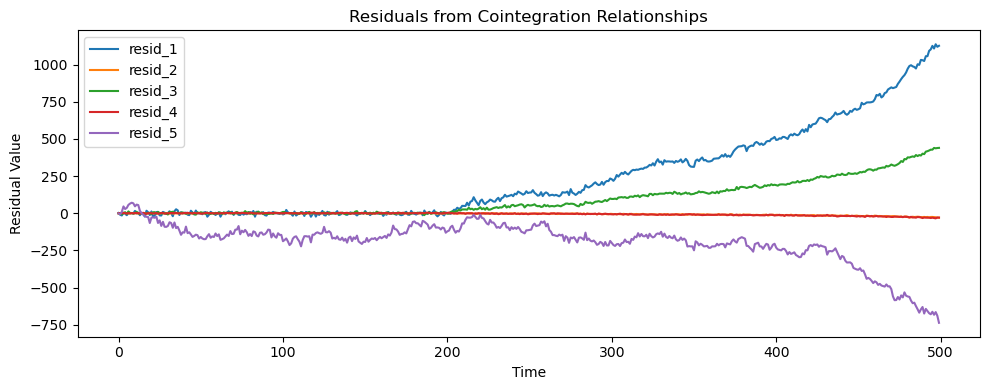

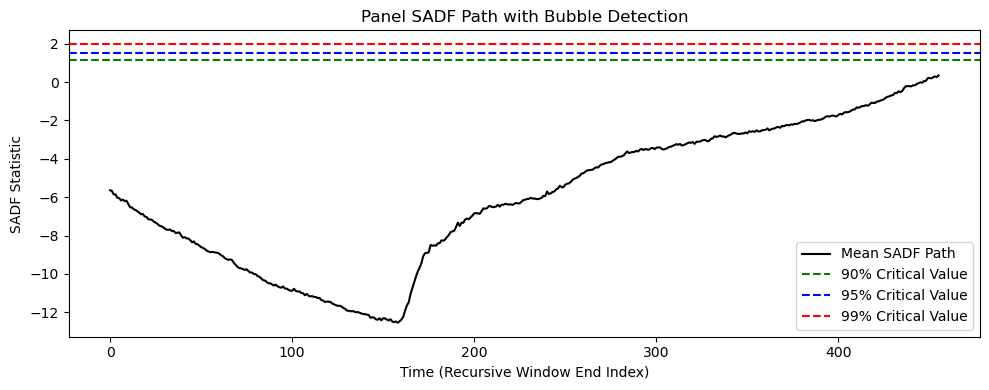

In [25]:
delta = 0.01
y1 = beta[0]*z + e_1
y2 = beta[1]*z + e_2
y3 = beta[2]*z + e_3
y4 = beta[3]*z + e_4
y5 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[4], delta = delta, eps = e_5)
df = pd.DataFrame({'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k]}) 


""" Generating Cointegration Relationship and Residuals"""
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\ncointegration vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], label='y2')
plt.plot(y3[:k], label='y3')
plt.plot(y4[:k], label='y3')
plt.plot(y5[:k], label='y3')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()


# --- ADF on each residual series ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")


""" Residuals after Bubble """
df_post = pd.DataFrame({'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:]})
res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post,
                        index=df_post.index,
                        columns=res_pre.columns)

# concatenate residuals so they match full sample length
residuals = pd.concat([res_pre, res_post], axis = 0).reset_index(drop=True)

# ------------- 4.  SADF test on each residual path ------------------------
r0        = 0.01 + 1.8 / np.sqrt(T)
min_win   = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

# equal-weight “panel” SADF (average across residuals)
panel_sadf = sadf_paths.mean(axis=0)
best_stat  = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")


# --- 1. Final residuals from all cointegration vectors ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)

#plt.axhline(0, color='k', lw=0.6)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Panel SADF path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')


plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
""" 2 time series are Bubble """

' 2 time series are Bubble '

Cointegration Rank: 5

cointegration vectors:
      beta_1    beta_2    beta_3    beta_4    beta_5
y1  1.000000  1.000000  1.000000  1.000000  1.000000
y2  5.559402 -0.760507 -0.798475  1.001645  2.507091
y3  4.494116  0.484581 -3.442348 -0.721219  0.110050
y4  2.421931  0.104553  1.551458 -0.801109  8.408973
y5  6.515297 -0.145691  2.634391 -0.199798 -4.241449

Residuals (first 5 rows):
     resid_1   resid_2   resid_3   resid_4    resid_5
0   5.257424 -2.933152 -3.512231 -0.086537  -1.275952
1 -10.637490 -0.469011 -3.581027 -0.302361  -6.536237
2 -15.389968 -0.329840 -7.800416  1.217368   9.019622
3   3.713460  2.202703 -0.263841  1.260994  44.692562
4  -3.604814  0.177198  7.029600  0.999304  28.496230


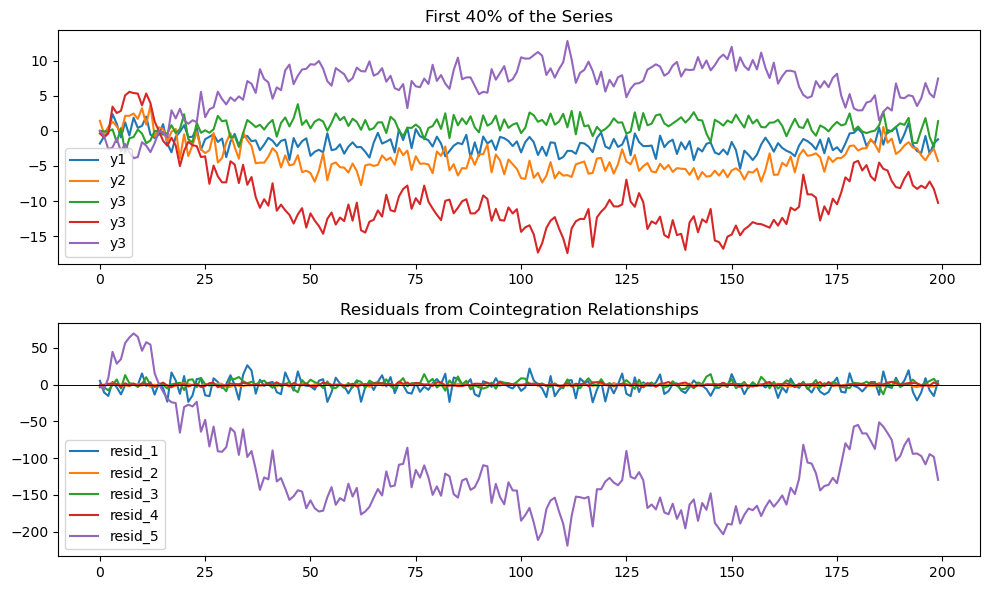

ADF on resid_1: stat = -13.390
ADF on resid_2: stat = -15.601
ADF on resid_3: stat = -14.668
ADF on resid_4: stat = -13.796
ADF on resid_5: stat = -2.531

Panel SADF (mean path) – max = 3.271


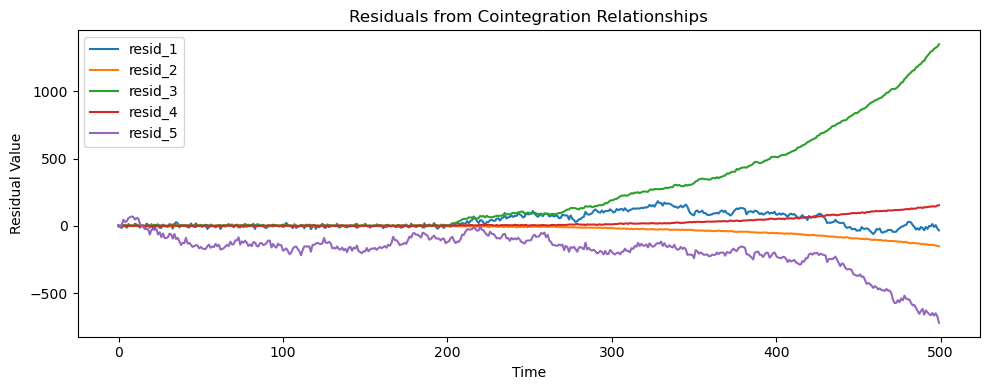

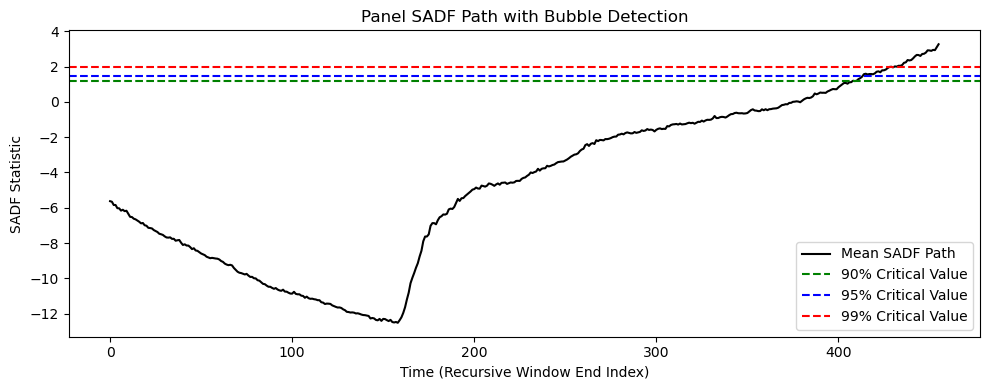

In [27]:
delta = 0.01
y1 = beta[0]*z + e_1
y2 = beta[1]*z + e_2
y3 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[2], delta = delta, eps = e_3)
y4 = beta[3]*z + e_4
y5 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[4], delta = delta, eps = e_5)
df = pd.DataFrame({'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k]}) 


""" Generating Cointegration Relationship and Residuals"""
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\ncointegration vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], label='y2')
plt.plot(y3[:k], label='y3')
plt.plot(y4[:k], label='y3')
plt.plot(y5[:k], label='y3')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()


# --- ADF on each residual series ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")


""" Residuals after Bubble """
df_post = pd.DataFrame({'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:]})
res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post,
                        index=df_post.index,
                        columns=res_pre.columns)

# concatenate residuals so they match full sample length
residuals = pd.concat([res_pre, res_post], axis = 0).reset_index(drop=True)

# ------------- 4.  SADF test on each residual path ------------------------
r0        = 0.01 + 1.8 / np.sqrt(T)
min_win   = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

# equal-weight “panel” SADF (average across residuals)
panel_sadf = sadf_paths.mean(axis=0)
best_stat  = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")


# --- 1. Final residuals from all cointegration vectors ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)

#plt.axhline(0, color='k', lw=0.6)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Panel SADF path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')


plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
""" 3 time series are bubble """

' 3 time series are bubble '

Cointegration Rank: 5

cointegration vectors:
      beta_1    beta_2    beta_3    beta_4    beta_5
y1  1.000000  1.000000  1.000000  1.000000  1.000000
y2  5.608530 -0.755503 -0.863635  1.004970  2.414986
y3  4.540419  0.485311 -3.487175 -0.737843  0.079571
y4  2.462228  0.101587  1.613685 -0.794210  7.962249
y5  6.597618 -0.147075  2.693891 -0.184727 -4.137083

Residuals (first 5 rows):
     resid_1   resid_2   resid_3   resid_4    resid_5
0   6.206114 -2.888077 -3.042597 -0.372365   1.642545
1 -10.760708 -0.467541 -3.650261 -0.320255  -6.158127
2 -15.596096 -0.322441 -8.010584  1.178775   8.868298
3   3.733482  2.202474 -0.284897  1.250035  42.778755
4  -3.635471  0.173255  7.151498  1.028886  27.235621


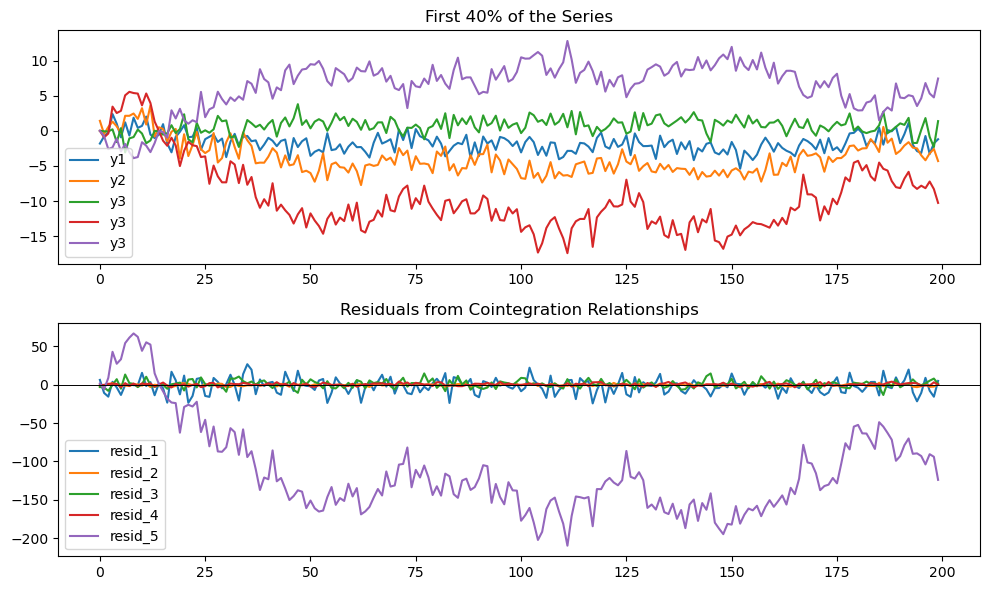

ADF on resid_1: stat = -13.398
ADF on resid_2: stat = -15.593
ADF on resid_3: stat = -14.683
ADF on resid_4: stat = -13.789
ADF on resid_5: stat = -2.534

Panel SADF (mean path) – max = 6.204


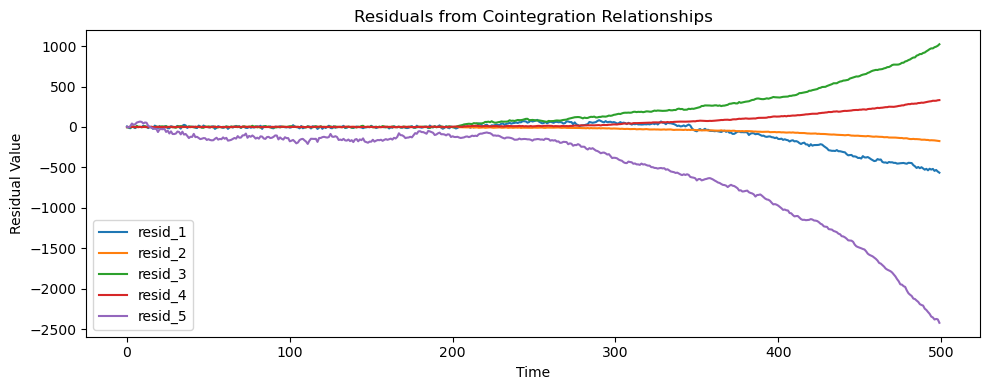

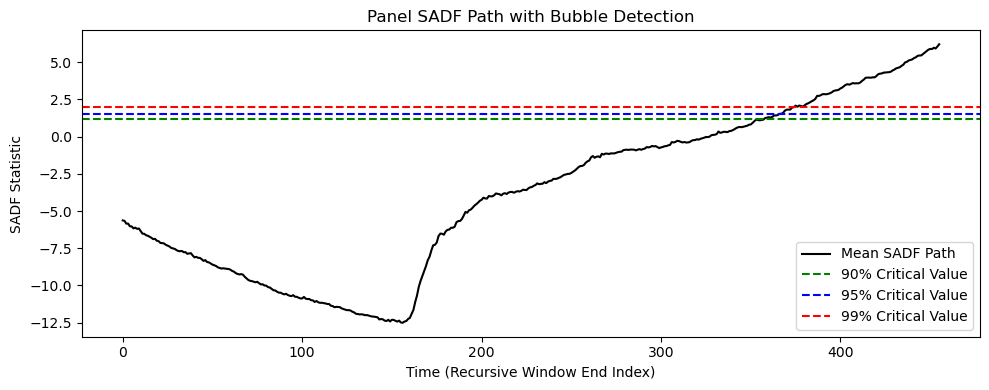

In [29]:
delta = 0.01
y1 = beta[0]*z + e_1
y2 = beta[1]*z + e_2
y3 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[2], delta = delta, eps = e_3)
y4 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[3], delta = delta, eps = e_4)
y5 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[4], delta = delta, eps = e_5)
df = pd.DataFrame({'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k]}) 


""" Generating Cointegration Relationship and Residuals"""
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\ncointegration vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], label='y2')
plt.plot(y3[:k], label='y3')
plt.plot(y4[:k], label='y3')
plt.plot(y5[:k], label='y3')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()


# --- ADF on each residual series ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")


""" Residuals after Bubble """
df_post = pd.DataFrame({'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:]})
res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post,
                        index=df_post.index,
                        columns=res_pre.columns)

# concatenate residuals so they match full sample length
residuals = pd.concat([res_pre, res_post], axis = 0).reset_index(drop=True)

# ------------- 4.  SADF test on each residual path ------------------------
r0        = 0.01 + 1.8 / np.sqrt(T)
min_win   = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

# equal-weight “panel” SADF (average across residuals)
panel_sadf = sadf_paths.mean(axis=0)
best_stat  = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")


# --- 1. Final residuals from all cointegration vectors ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)

#plt.axhline(0, color='k', lw=0.6)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Panel SADF path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

for i, val in enumerate(panel_sadf):
    if val > crit_val_99:
        #plt.axvline(i + min_win, color='orange', linestyle='--', alpha=0.6, label='Start of Bubble')
        break

plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
""" 5 time series are bubble """

' 5 time series are bubble '

Cointegration Rank: 5

cointegration vectors:
      beta_1    beta_2    beta_3    beta_4    beta_5
y1  1.000000  1.000000  1.000000  1.000000  1.000000
y2  8.884123 -0.419810 -0.288327  1.786362 -5.409002
y3 -1.196238  0.477009 -1.964225 -0.490786 -2.901667
y4  5.166028  0.085467  0.666136 -2.367383 -6.688775
y5 -7.251315 -0.373097  0.492796  1.261183 -7.216393

Residuals (first 5 rows):
     resid_1   resid_2   resid_3   resid_4    resid_5
0   0.000000  0.000000  0.000000  0.000000   0.000000
1 -10.125040 -0.553485 -1.767051  0.659853   9.109237
2   4.723425  0.124250 -2.470385  1.129933   6.467941
3   6.095434  2.284389  0.884631  0.321162 -41.295717
4  -8.875663 -0.145393  3.448157  1.733001 -33.964175


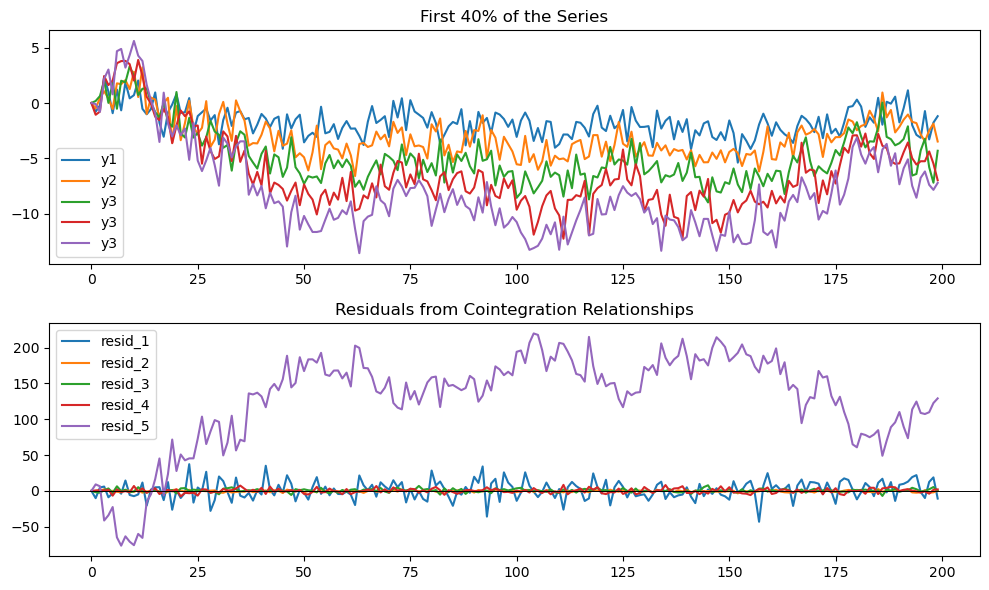

ADF on resid_1: stat = -12.212
ADF on resid_2: stat = -15.645
ADF on resid_3: stat = -14.877
ADF on resid_4: stat = -5.369
ADF on resid_5: stat = -2.098

Panel SADF (mean path) – max = 8.348


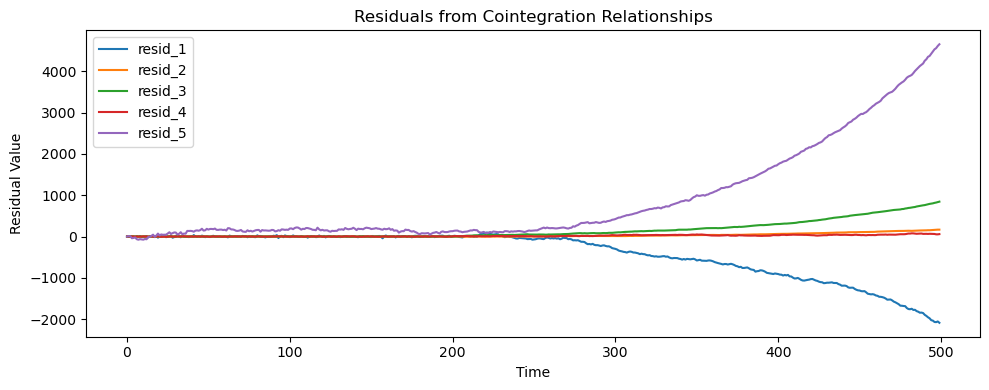

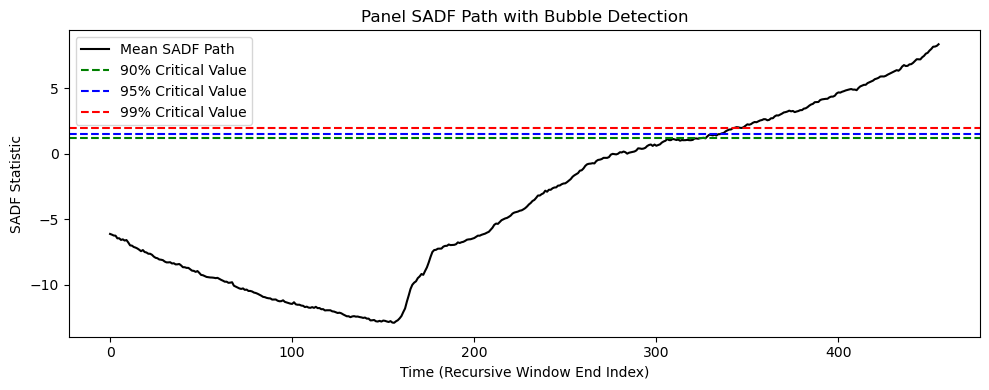

In [31]:
beta = np.array([0.2,0.4,0.6, 0.8,1])
delta = 0.01
y1 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[0], delta = delta, eps = e_1)
y2 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[1], delta = delta, eps = e_2)
y3 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[2], delta = delta, eps = e_3)
y4 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[3], delta = delta, eps = e_4)
y5 = mf.generate_bubble_series_from_z(z = z, r = r, beta=beta[4], delta = delta, eps = e_5)
df = pd.DataFrame({'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k]}) 


""" Generating Cointegration Relationship and Residuals"""
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\ncointegration vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1[:k], label='y1')
plt.plot(y2[:k], label='y2')
plt.plot(y3[:k], label='y3')
plt.plot(y4[:k], label='y3')
plt.plot(y5[:k], label='y3')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()


# --- ADF on each residual series ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")


""" Residuals after Bubble """
df_post = pd.DataFrame({'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:]})
res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post,
                        index=df_post.index,
                        columns=res_pre.columns)

# concatenate residuals so they match full sample length
residuals = pd.concat([res_pre, res_post], axis = 0).reset_index(drop=True)

# ------------- 4.  SADF test on each residual path ------------------------
r0        = 0.01 + 1.8 / np.sqrt(T)
min_win   = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

# equal-weight “panel” SADF (average across residuals)
panel_sadf = sadf_paths.mean(axis=0)
best_stat  = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")


# --- 1. Final residuals from all cointegration vectors ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)

#plt.axhline(0, color='k', lw=0.6)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Panel SADF path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')

for i, val in enumerate(panel_sadf):
    if val > crit_val_99:
        #plt.axvline(i + min_win, color='orange', linestyle='--', alpha=0.6, label='Start of Bubble')
        break

plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()

### Cointegration - 10

In [67]:
beta = np.array([0.2,0.5,-0.1, 1.2,-0.8, -1.6, 0.4, 1.8, -0.3, 2])
e_1 = np.random.normal(0,1,T)
e_2 = np.random.normal(0,1,T)
e_3 = np.random.normal(0,1,T)
e_4 = np.random.normal(0,1,T)
e_5 = np.random.normal(0,1,T)
e_6 = np.random.normal(0,1,T)
e_7 = np.random.normal(0,1,T)
e_8 = np.random.normal(0,1,T)
e_9 = np.random.normal(0,1,T)
e_10 = np.random.normal(0,1,T)

In [ ]:
""" 2 time series are bubble """

Cointegration Rank: 10

Cointegration Vectors:
       beta_1    beta_2    beta_3    beta_4    beta_5    beta_6      beta_7  \
y1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    1.000000   
y2  -1.065384 -4.554044 -0.914596  0.879141 -0.842566 -0.692864 -261.454004   
y3  -0.882499  1.377970 -0.428769 -1.989650 -9.019198 -1.650675  -71.496646   
y4   0.709293 -5.514571 -0.733956 -1.098933 -1.755924 -0.560545  212.516612   
y5   0.140408  4.087882 -1.090349  1.534122  5.760233 -2.312370  121.892172   
y6  -0.727797 -6.155317  1.034810 -0.455199  3.013117 -1.457677    9.369545   
y7   0.039623  0.495070  1.213479  3.124855 -4.318909 -2.830930   14.698177   
y8   1.973270 -0.478007  0.383459 -3.662218  1.857926 -1.399446 -160.165192   
y9   2.030598 -2.247475 -0.705223  2.616720 -3.404985  0.120342   42.782721   
y10 -0.263575  0.660456  0.687645 -0.371401  6.019178 -1.359565  -32.286478   

       beta_8    beta_9   beta_10  
y1   1.000000  1.000000  1.000000  
y2  -0.1932

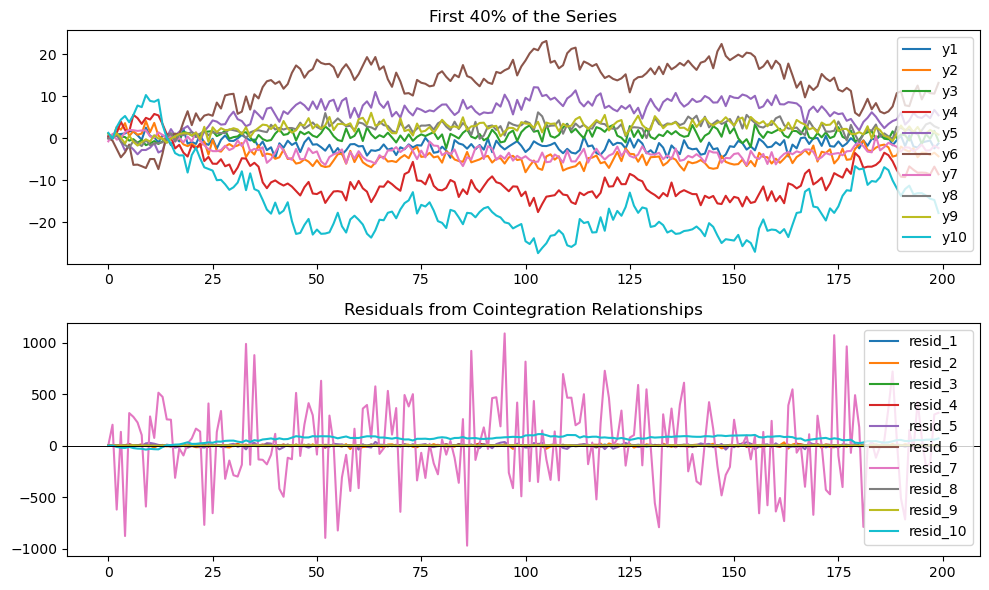

ADF on resid_1: stat = -12.695
ADF on resid_2: stat = -15.970
ADF on resid_3: stat = -8.740
ADF on resid_4: stat = -5.370
ADF on resid_5: stat = -7.692
ADF on resid_6: stat = -14.292
ADF on resid_7: stat = -9.209
ADF on resid_8: stat = -7.908
ADF on resid_9: stat = -5.807
ADF on resid_10: stat = -2.225

Panel SADF (mean path) – max = 1.055


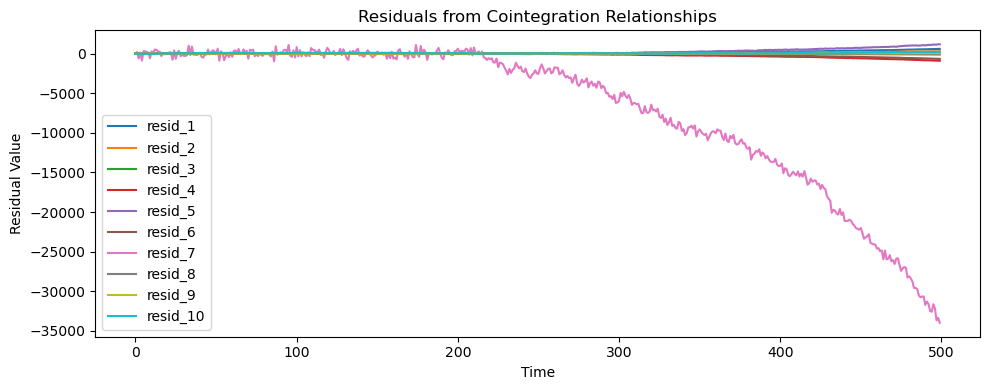

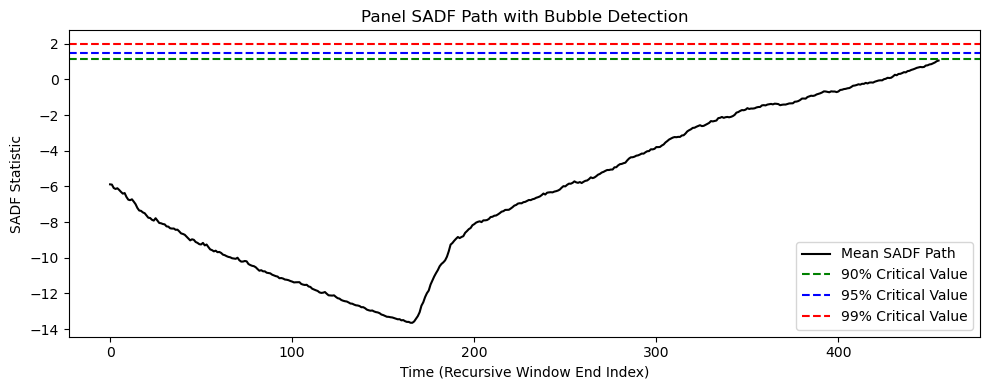

In [71]:
delta = 0.01

# Generate 10 time series
y1 = beta[0]*z + e_1
y2 = beta[1]*z + e_2
y3 = beta[2]*z + e_3
y4 = beta[3]*z + e_4
y5 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[4], delta=delta, eps=e_5)
y6 = beta[5]*z + e_6
y7 = beta[6]*z + e_7
y8 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[8], delta=delta, eps=e_8)
y9 = beta[8]*z + e_9
y10 = beta[9]*z + e_10

# DataFrame for first part (before bubble ends)
df = pd.DataFrame({
    'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k],
    'y6': y6[:k], 'y7': y7[:k], 'y8': y8[:k], 'y9': y9[:k], 'y10': y10[:k]
})

# --- Johansen Analysis ---
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\nCointegration Vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())

# --- Plot Original Series (first k values) ---
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
for i in range(1, 11):
    plt.plot(eval(f'y{i}')[:k], label=f'y{i}')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

# --- Plot Residuals ---
plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()

# --- ADF Test on Residuals ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")

# --- Residuals after Bubble Ends ---
df_post = pd.DataFrame({
    'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:],
    'y6': y6[k:], 'y7': y7[k:], 'y8': y8[k:], 'y9': y9[k:], 'y10': y10[k:]
})

res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post, index=df_post.index, columns=res_pre.columns)

# --- Full Residuals ---
residuals = pd.concat([res_pre, res_post], axis=0).reset_index(drop=True)

# --- SADF Panel Test ---
r0 = 0.01 + 1.8 / np.sqrt(T)
min_win = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

panel_sadf = sadf_paths.mean(axis=0)
best_stat = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")

# --- Plot Final Residuals ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot SADF Path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')
plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
""" 4 time series are bubble """

Cointegration Rank: 10

Cointegration Vectors:
        beta_1    beta_2    beta_3    beta_4    beta_5    beta_6     beta_7  \
y1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
y2   -1.875183 -1.087754 -0.008235 -4.550366 -1.265700 -0.019177  -9.078258   
y3   -4.535532 -0.569583 -0.763357  0.773384 -4.981459 -1.164990  -0.864714   
y4    5.940699 -0.739106  0.164326 -1.971796 -1.408919  0.044800  11.058561   
y5   -1.329582  1.029561 -1.134747 -2.057307  2.333763 -2.387172   5.074586   
y6    2.996261 -1.578929  1.334963  0.591656  1.785294 -1.755373  -0.489464   
y7   -3.727264  0.973776  1.634938 -1.243766 -2.164195 -2.699786  -0.818649   
y8    9.791298 -0.501927 -0.456266  3.491937  1.231111 -1.488622  -5.784176   
y9   11.710658  1.115668  0.392281 -2.475788 -1.680188  0.329869   2.535385   
y10  -8.055215  0.137210  0.529473 -1.236633  2.236885 -0.585966   2.768127   

       beta_8    beta_9   beta_10  
y1   1.000000  1.000000  1.000000  
y2   0.0583

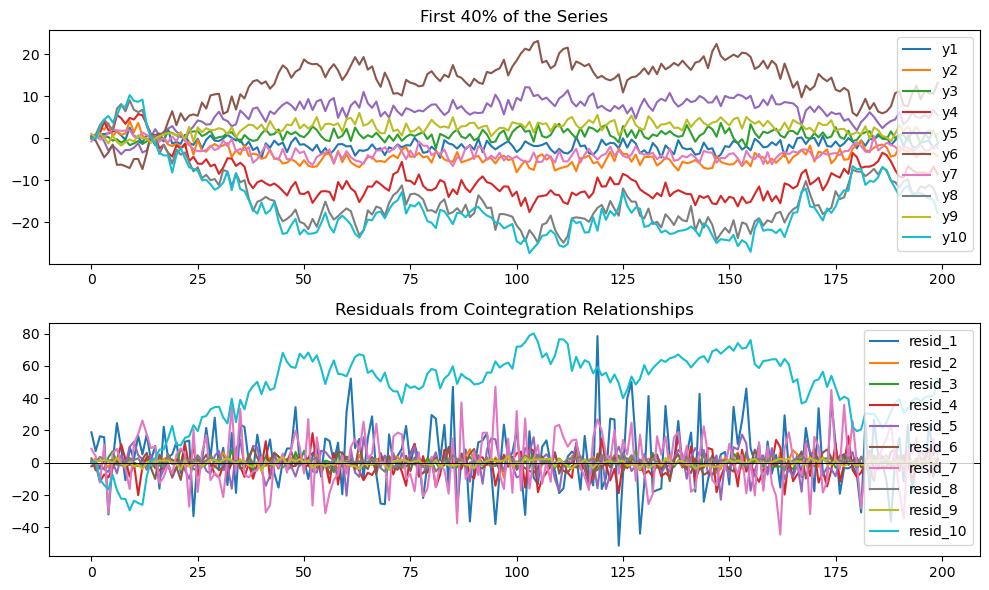

ADF on resid_1: stat = -12.680
ADF on resid_2: stat = -15.111
ADF on resid_3: stat = -6.454
ADF on resid_4: stat = -9.281
ADF on resid_5: stat = -5.896
ADF on resid_6: stat = -13.608
ADF on resid_7: stat = -14.893
ADF on resid_8: stat = -8.275
ADF on resid_9: stat = -5.824
ADF on resid_10: stat = -2.190

Panel SADF (mean path) – max = 0.519


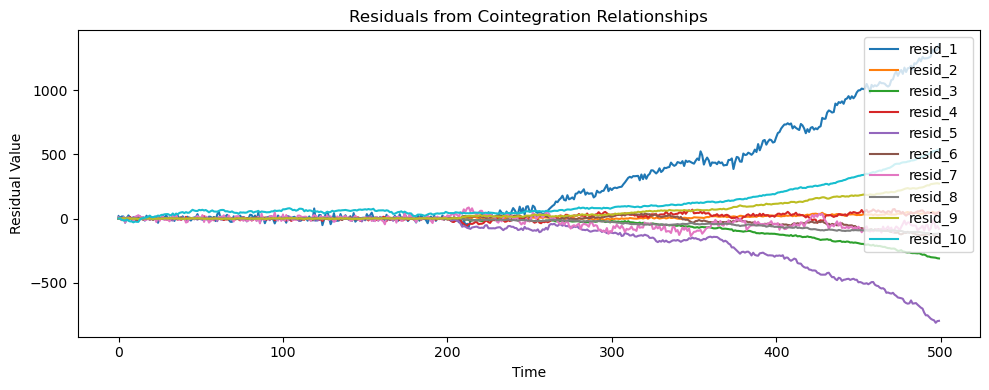

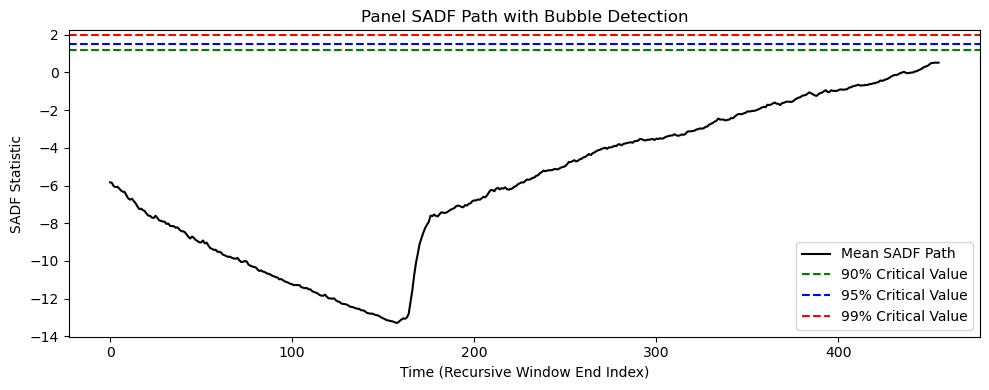

In [75]:
delta = 0.01

# Generate 10 time series
y1 = beta[0]*z + e_1
y2 = beta[1]*z + e_2
y3 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[2], delta=delta, eps=e_3)
y4 = beta[3]*z + e_4
y5 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[4], delta=delta, eps=e_5)
y6 = beta[5]*z + e_6
y7 = beta[6]*z + e_7
y8 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[7], delta=delta, eps=e_8)
y9 = beta[8]*z + e_9
y10 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[9], delta=delta, eps=e_10)

# DataFrame for first part (before bubble ends)
df = pd.DataFrame({
    'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k],
    'y6': y6[:k], 'y7': y7[:k], 'y8': y8[:k], 'y9': y9[:k], 'y10': y10[:k]
})

# --- Johansen Analysis ---
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\nCointegration Vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())

# --- Plot Original Series (first k values) ---
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
for i in range(1, 11):
    plt.plot(eval(f'y{i}')[:k], label=f'y{i}')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

# --- Plot Residuals ---
plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()

# --- ADF Test on Residuals ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")

# --- Residuals after Bubble Ends ---
df_post = pd.DataFrame({
    'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:],
    'y6': y6[k:], 'y7': y7[k:], 'y8': y8[k:], 'y9': y9[k:], 'y10': y10[k:]
})

res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post, index=df_post.index, columns=res_pre.columns)

# --- Full Residuals ---
residuals = pd.concat([res_pre, res_post], axis=0).reset_index(drop=True)

# --- SADF Panel Test ---
r0 = 0.01 + 1.8 / np.sqrt(T)
min_win = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

panel_sadf = sadf_paths.mean(axis=0)
best_stat = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")

# --- Plot Final Residuals ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot SADF Path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')
plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()


Cointegration Rank: 10

Cointegration Vectors:
        beta_1    beta_2    beta_3    beta_4    beta_5    beta_6     beta_7  \
y1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000   
y2   -1.756797 -1.086683 -0.011800 -4.403422 -1.255122 -0.021432  -9.220268   
y3   -4.137183 -0.559478 -0.773920  0.697136 -4.969476 -1.141373  -0.912261   
y4    5.357275 -0.760147  0.154452 -1.911815 -1.400577  0.036125  11.207343   
y5   -1.128056  1.083189 -1.085544 -1.969621  2.324874 -2.374947   5.116811   
y6    2.606056 -1.639839  1.284016  0.568903  1.765498 -1.741257  -0.517022   
y7   -3.356267  0.974934  1.641082 -1.115245 -2.180854 -2.668742  -0.822568   
y8    8.872063 -0.530243 -0.470969  3.340389  1.218040 -1.473901  -5.866287   
y9   10.739560  1.123348  0.424440 -2.337482 -1.667865  0.328681   2.577967   
y10  -7.323972  0.148581  0.530171 -1.170056  2.226744 -0.582528   2.785983   

       beta_8    beta_9   beta_10  
y1   1.000000  1.000000  1.000000  
y2   0.0593

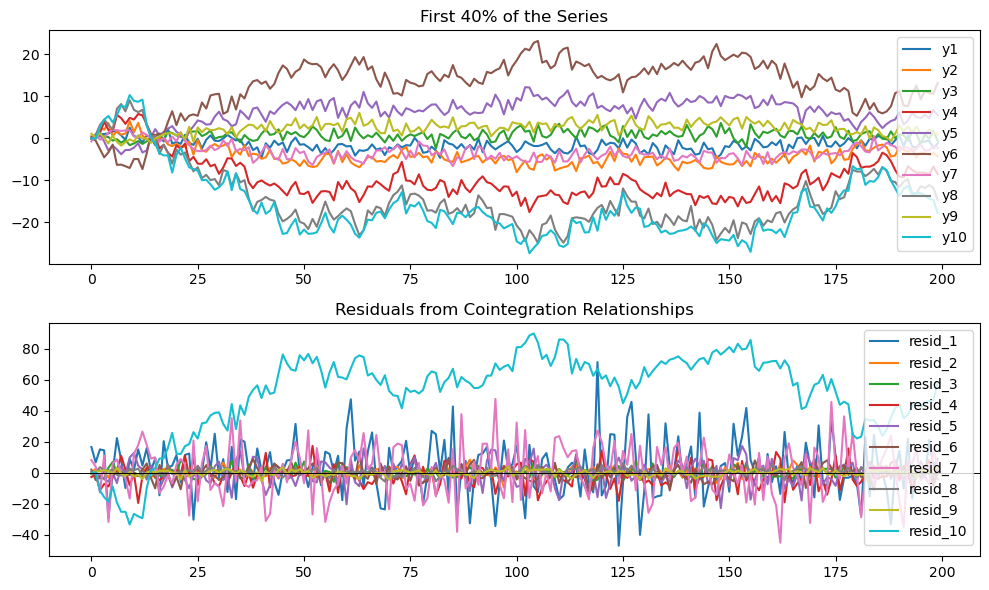

ADF on resid_1: stat = -12.674
ADF on resid_2: stat = -15.082
ADF on resid_3: stat = -6.498
ADF on resid_4: stat = -9.285
ADF on resid_5: stat = -5.899
ADF on resid_6: stat = -13.599
ADF on resid_7: stat = -14.893
ADF on resid_8: stat = -8.295
ADF on resid_9: stat = -5.825
ADF on resid_10: stat = -2.193

Panel SADF (mean path) – max = 0.804


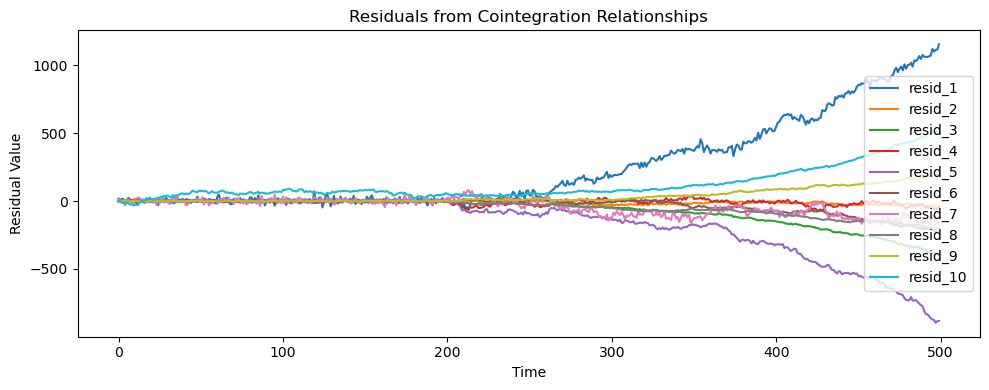

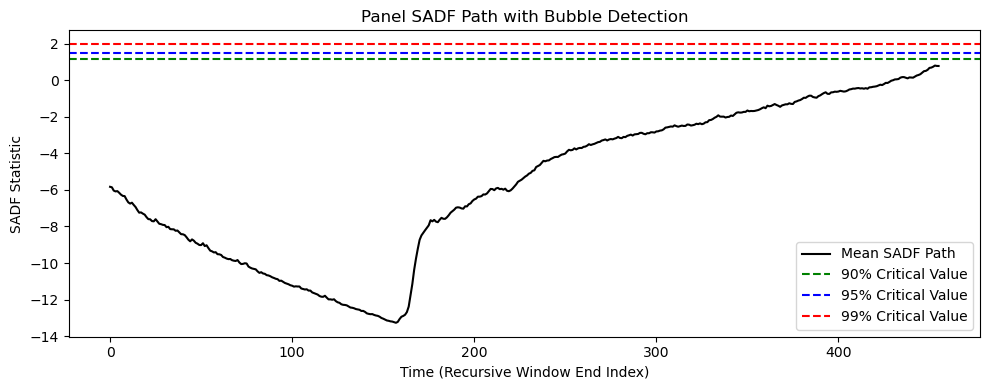

In [77]:
delta = 0.01

# Generate 10 time series
y1 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[0], delta=delta, eps=e_1)
y2 = beta[1]*z + e_2
y3 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[2], delta=delta, eps=e_3)
y4 = beta[3]*z + e_4
y5 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[4], delta=delta, eps=e_5)
y6 = beta[5]*z + e_6
y7 = beta[6]*z + e_7
y8 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[7], delta=delta, eps=e_8)
y9 = beta[8]*z + e_9
y10 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[9], delta=delta, eps=e_10)

# DataFrame for first part (before bubble ends)
df = pd.DataFrame({
    'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k],
    'y6': y6[:k], 'y7': y7[:k], 'y8': y8[:k], 'y9': y9[:k], 'y10': y10[:k]
})

# --- Johansen Analysis ---
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\nCointegration Vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())

# --- Plot Original Series (first k values) ---
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
for i in range(1, 11):
    plt.plot(eval(f'y{i}')[:k], label=f'y{i}')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

# --- Plot Residuals ---
plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()

# --- ADF Test on Residuals ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")

# --- Residuals after Bubble Ends ---
df_post = pd.DataFrame({
    'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:],
    'y6': y6[k:], 'y7': y7[k:], 'y8': y8[k:], 'y9': y9[k:], 'y10': y10[k:]
})

res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post, index=df_post.index, columns=res_pre.columns)

# --- Full Residuals ---
residuals = pd.concat([res_pre, res_post], axis=0).reset_index(drop=True)

# --- SADF Panel Test ---
r0 = 0.01 + 1.8 / np.sqrt(T)
min_win = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

panel_sadf = sadf_paths.mean(axis=0)
best_stat = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")

# --- Plot Final Residuals ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot SADF Path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')
plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()


Cointegration Rank: 10

Cointegration Vectors:
        beta_1    beta_2    beta_3    beta_4    beta_5    beta_6    beta_7  \
y1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
y2   -1.964963 -1.083894 -0.018239 -5.345615 -1.243028 -0.022141 -7.894640   
y3   -5.279284 -0.585361 -0.760592  1.055411 -4.774655 -1.087139 -0.684036   
y4    7.219396 -0.704675  0.195983 -2.307116 -1.367155  0.007108  9.561856   
y5   -1.477512  0.928683 -1.276194 -2.391988  2.213727 -2.307444  4.365974   
y6    3.559038 -1.462891  1.502880  0.690597  1.730565 -1.654119 -0.408765   
y7   -4.780624  0.982609  1.663138 -1.656501 -2.065039 -2.571995 -0.784503   
y8   11.629272 -0.456474 -0.367860  4.311154  1.180952 -1.406712 -5.039354   
y9   13.854833  1.093761  0.349476 -3.001724 -1.622441  0.308852  2.229622   
y10  -9.601633  0.122635  0.502054 -1.588756  2.160442 -0.548520  2.451391   

       beta_8    beta_9   beta_10  
y1   1.000000  1.000000  1.000000  
y2   0.069820  0.58927

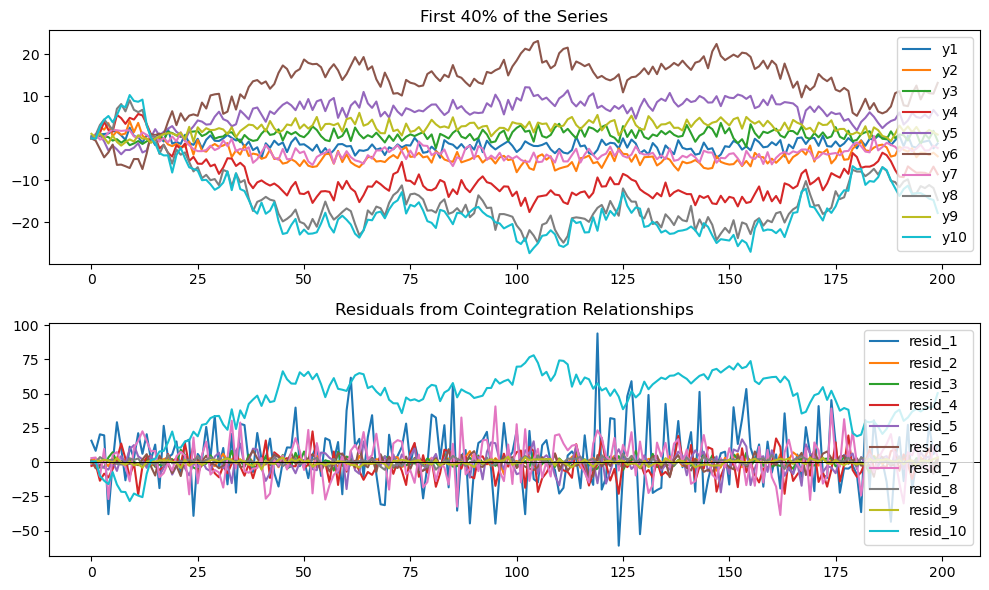

ADF on resid_1: stat = -12.679
ADF on resid_2: stat = -15.172
ADF on resid_3: stat = -6.331
ADF on resid_4: stat = -9.255
ADF on resid_5: stat = -5.900
ADF on resid_6: stat = -13.579
ADF on resid_7: stat = -14.870
ADF on resid_8: stat = -8.282
ADF on resid_9: stat = -5.824
ADF on resid_10: stat = -2.186

Panel SADF (mean path) – max = 3.374


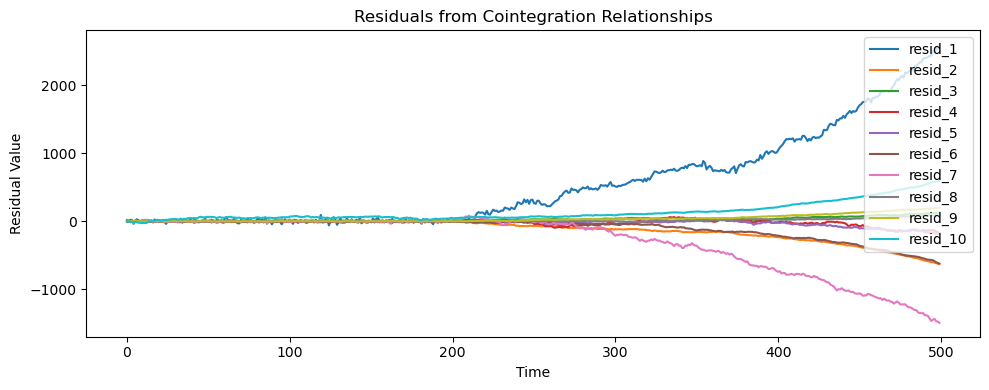

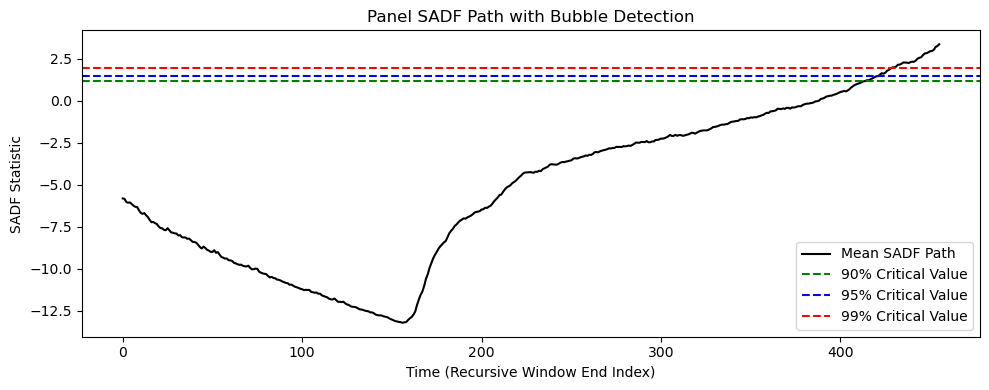

In [101]:
delta = 0.01

# Generate 10 time series
y1 = beta[0]*z + e_1
y2 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[1], delta=delta, eps=e_2)
y3 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[2], delta=delta, eps=e_3)
y4 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[3], delta=delta, eps=e_4)
y5 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[4], delta=delta, eps=e_5)
y6 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[5], delta=delta, eps=e_6)
y7 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[6], delta=delta, eps=e_7)
y8 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[7], delta=delta, eps=e_8)
y9 = beta[8]*z + e_9
y10 = mf.generate_bubble_series_from_z(z=z, r=r, beta=beta[9], delta=delta, eps=e_10)

# DataFrame for first part (before bubble ends)
df = pd.DataFrame({
    'y1': y1[:k], 'y2': y2[:k], 'y3': y3[:k], 'y4': y4[:k], 'y5': y5[:k],
    'y6': y6[:k], 'y7': y7[:k], 'y8': y8[:k], 'y9': y9[:k], 'y10': y10[:k]
})

# --- Johansen Analysis ---
rank, B , res_pre = mf.johansen_analysis(df)

print(f"Cointegration Rank: {rank}")
print("\nCointegration Vectors:")
print(B)
print("\nResiduals (first 5 rows):")
print(res_pre.head())

# --- Plot Original Series (first k values) ---
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
for i in range(1, 11):
    plt.plot(eval(f'y{i}')[:k], label=f'y{i}')
plt.title(f'First {r*100:.0f}% of the Series')
plt.legend()

# --- Plot Residuals ---
plt.subplot(2, 1, 2)
for col in res_pre.columns:
    plt.plot(res_pre[col], label=col)
plt.axhline(0, color='black', lw=0.7)
plt.title('Residuals from Cointegration Relationships')
plt.legend()

plt.tight_layout()
plt.show()

# --- ADF Test on Residuals ---
for col in res_pre.columns:
    stat = adfuller(res_pre[col], autolag='AIC')[0]
    print(f"ADF on {col}: stat = {stat:.3f}")

# --- Residuals after Bubble Ends ---
df_post = pd.DataFrame({
    'y1': y1[k:], 'y2': y2[k:], 'y3': y3[k:], 'y4': y4[k:], 'y5': y5[k:],
    'y6': y6[k:], 'y7': y7[k:], 'y8': y8[k:], 'y9': y9[k:], 'y10': y10[k:]
})

res_post = df_post.values @ B.values              
res_post = pd.DataFrame(res_post, index=df_post.index, columns=res_pre.columns)

# --- Full Residuals ---
residuals = pd.concat([res_pre, res_post], axis=0).reset_index(drop=True)

# --- SADF Panel Test ---
r0 = 0.01 + 1.8 / np.sqrt(T)
min_win = int(np.floor(r0 * T))

sadf_paths = []
for col in residuals:
    sadf_paths.append(mf.sadf_series(residuals[col].values, min_win))
sadf_paths = np.vstack(sadf_paths)    

panel_sadf = sadf_paths.mean(axis=0)
best_stat = panel_sadf.max()
print(f"\nPanel SADF (mean path) – max = {best_stat:.3f}")

# --- Plot Final Residuals ---
plt.figure(figsize=(10, 4))
for col in residuals:
    plt.plot(residuals[col], label=col)
plt.title("Residuals from Cointegration Relationships")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot SADF Path ---
plt.figure(figsize=(10, 4))
plt.plot(panel_sadf, label='Mean SADF Path', color='black')
plt.axhline(crit_val_90, color='green', linestyle='--', label='90% Critical Value')
plt.axhline(crit_val_95, color='blue', linestyle='--', label='95% Critical Value')
plt.axhline(crit_val_99, color='red', linestyle='--', label='99% Critical Value')
plt.title("Panel SADF Path with Bubble Detection")
plt.xlabel("Time (Recursive Window End Index)")
plt.ylabel("SADF Statistic")
plt.legend()
plt.tight_layout()
plt.show()
